In [4]:
import numpy as np
import math
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [5]:
def get_index_2d (dim,n): #get caratesian coordinate
    j=n % dim
    j=j/1. #float( i)
    i=(n-j)/dim
    return (i,j)# pourquoi float?

#Blgovind
def Balgovind(dim,L):
    sub_B=np.zeros((dim**2,dim**2))
    for i in range(dim**2):
        (a1,b1)=get_index_2d(dim,i)
        for j in range(dim**2):
            (a2,b2)=get_index_2d(dim,j) #reprends les donnees caracterisennes
            r=math.sqrt((a1-a2)**2+(b1-b2)**2)
            sub_B[i,j]=(1+r/L)*(math.exp(-r/L))
                                
                
    B1=np.concatenate((sub_B, np.zeros((dim**2,dim**2))), axis=1)
    B2=np.concatenate(( np.zeros((dim**2,dim**2)), sub_B),axis=1)
    B=np.concatenate((B1,B2), axis=0)# a changer construction matrice B
    return B

def Gaussian(dim,L):
    sub_B=np.zeros((dim**2,dim**2))
    for i in range(dim**2):
        (a1,b1)=get_index_2d(dim,i)
        for j in range(dim**2):
            (a2,b2)=get_index_2d(dim,j) #reprends les donnees caracterisennes
            r=math.sqrt((a1-a2)**2+(b1-b2)**2)
            sub_B[i,j]=math.exp(-r**2/(2*L**2))
                                
                
    B1=np.concatenate((sub_B, np.zeros((dim**2,dim**2))), axis=1)
    B2=np.concatenate(( np.zeros((dim**2,dim**2)), sub_B),axis=1)
    B=np.concatenate((B1,B2), axis=0)# a changer construction matrice B
    return B

def expontielle(dim,L):
    sub_B=np.zeros((dim**2,dim**2))
    for i in range(dim**2):
        (a1,b1)=get_index_2d(dim,i)
        for j in range(dim**2):
            (a2,b2)=get_index_2d(dim,j) #reprends les donnees caracterisennes
            r=math.sqrt((a1-a2)**2+(b1-b2)**2)
            sub_B[i,j]=math.exp(-r/L)
                                
                
    B1=np.concatenate((sub_B, np.zeros((dim**2,dim**2))), axis=1)
    B2=np.concatenate(( np.zeros((dim**2,dim**2)), sub_B),axis=1)
    B=np.concatenate((B1,B2), axis=0)# a changer construction matrice B
    return B

def bord_M_aleatoire(dimension, proba):
    M=np.zeros((dimension**2,dimension**2))
    for i in range(dimension**2):
        for j in range(dimension**2):
            if j % 10==0 or j % 10==9:
                M[i,j]=np.random.binomial(1, proba)
            elif j<=9 or j>=90:
                M[i,j]=np.random.binomial(1, proba)
    return M       
        
    
def cov_to_cor(B):
    inv_diag_B=np.linalg.inv(sqrtm(np.diag(np.diag(B))))
    inv_diag_B=np.copy(inv_diag_B.real)
    cor_B=np.dot(inv_diag_B,np.dot(B,inv_diag_B))
    return cor_B


########################################################################
    #covariance 1d
def Balgovind_1D(dim,L):
    B=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            r=abs(i-j)*1.
            B[i,j]=(1+r/L)*(math.exp(-r/L))

    return B

def expontielle_1D(dim,L):
    B=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            r=abs(i-j)*1.
            B[i,j]=math.exp(-r/L)

    return B

def Gaussian_1D(dim,L):
    B=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            r=abs(i-j)*1.
            B[i,j]=math.exp(-r**2/(2*L**2))

    return B

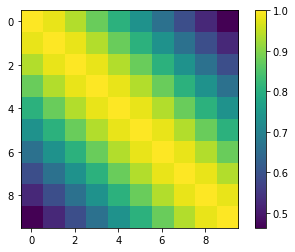

In [6]:
# 1D
B = Balgovind_1D(10,5)
im = plt.imshow(B)
plt.colorbar(im)

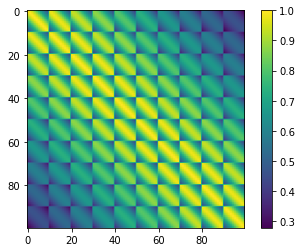

In [8]:
# 2D
B = Balgovind(10,5)[:100,:100]
im = plt.imshow(B)
plt.colorbar(im)
